In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
from src.mechanism.llg_auction import LLGAuction
from src.game import Game
from src.strategy import Strategy
from src.learner import SODA

In [22]:
# parameter mechanism
bidder = ['L', 'L', 'G']
o_space = {'L':[0,1], 'G':[0,2]}
a_space = {'L':[0,1], 'G':[0,2]}

param_prior = {'distribution':'uniform',
               'gamma': 0.1}

param_util ={
    'payment_rule': 'NB',
    'tie_breaking': 'lose',
            }

# parameter approximation game
n = 64
m = 64

# parameter learner
max_iter = int(2e3)
tol = 1e-4
steprule_bool = True
eta = 20
beta = 1/20

In [23]:
# create mechanism
mechanism = LLGAuction(bidder, o_space, a_space, param_prior, param_util)

# create approximation game
game = Game(mechanism, n, m)
game.get_utility(mechanism)

# create learner
soda = SODA(max_iter, tol, steprule_bool, eta, beta)

#create and initialize strategies
strategies = {}
for i in game.set_bidder:
    strategies[i] = Strategy(i, game)
    strategies[i].initialize('random')

In [24]:
# run soda
soda.run(mechanism, game, strategies)

 96%|███████████████████▏| 1.92k/2.00k [01:02<00:02, 30.6it/s]            

Convergence after 1920 iterations
Relative utility loss 0.01 %


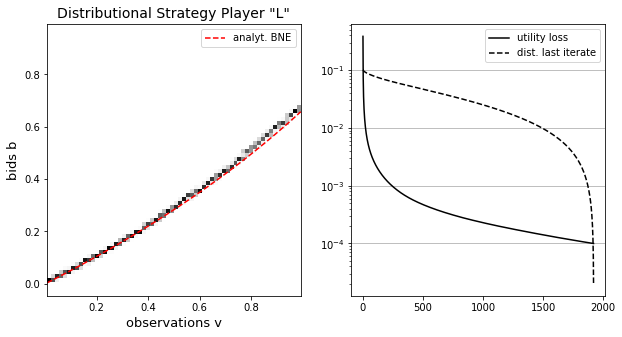

In [25]:
agent = 'L'
x = strategies[agent].o_discr
bne = mechanism.get_bne(agent, x)
strategies[agent].plot(True, bne)